# EDA

In [2]:
import pandas as pd
df = pd.read_csv('cancer patient data sets.csv')

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# Algorithm 1: Random Forest Regressor

In [35]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [14]:
# split into X and y sets
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk']]
y = df['chronic Lung Disease']

# partition data, ensure reproducilibility
seed = random.seed()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed, stratify= y)

# fitting the model
dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

In [25]:
# hyperparameter tuning
param_dist = {'criterion': ['gini','entropy'],
              'max_depth': [5,10,20]}

dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)

# finding best parameter
rand_search = RandomizedSearchCV(dt, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

best = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'criterion': 'entropy'}


In [28]:
# displaying accuracy of best model
dt = DecisionTreeClassifier(max_depth = 10, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)
accuracy = round(dt.score(X_test, y_test),2)
print('The accuracy of this model is:', accuracy)

The accuracy of this model is: 0.98


In [29]:
# evaluating results using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.80      1.00      0.89        35
           3       0.69      0.89      0.78        28
           4       0.90      1.00      0.95        28
           5       1.00      0.56      0.72        16
           6       0.92      0.95      0.94        62
           7       1.00      0.76      0.86        21

    accuracy                           0.86       200
   macro avg       0.76      0.74      0.73       200
weighted avg       0.83      0.86      0.84       200



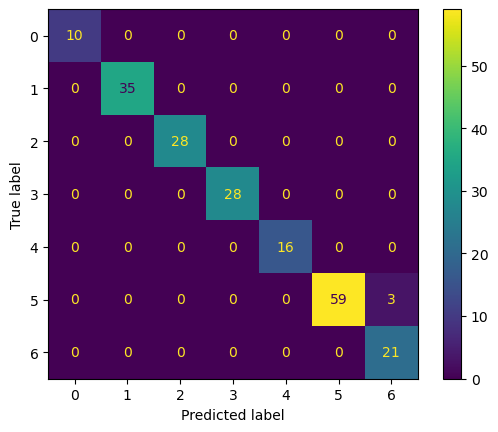

In [37]:
# evaluating results using confusion matrix
y_pred = best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();